# Introduction to Bayesian Analysis via Grid Methods

With python!

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Biased Coins
Let's say we have some obervations of coin flips.

In [2]:
observations = np.array([1,0,1,1,1,0])
positive_obs = sum(observations)
total_obs = len(observations)

In [3]:
number_of_hypotheses = 100
hypotheses = np.linspace(0,1, number_of_hypotheses)

You know what... let's do something more interesting.

## Measurement Errors

Let's look at a more complex example. Here we are going to simulate a guassian process with some known parameters that we will try to recover.

Let's say we only saw 5 observations.

In [4]:
mean_true=15
sd_true=2

observations = np.random.normal(mean_true, sd_true, 5)
observations

array([13.11655638, 15.08398706, 16.28398811, 16.37142067, 14.61621566])

First let's take a standard approach and take the mean and standard deviation or our observed samples. We could stop here and generate a normal distribution that quantified our beleif in what the true paramters are.

In [5]:
np.mean(observations), np.std(observations)

(15.094433577417652, 1.1988774545029364)

But let's get our Bayes on and incorporate a prior. We'll keep it flat for now, but this will still give us a better idea about how our hypotheses are likely to be distributed.

Setting up our "grid" for two parameters we are trying to infer

In [6]:
hypotheses_1 = np.linspace(12,18,100) #These are all the means we want to test
hypotheses_2 = np.linspace(0.001,4,100) #These are all the standard deviations we want to test

In [7]:
prior = np.ones([len(hypotheses_1),len(hypotheses_2)]) # Here we are choosing a flat prior

In [8]:
unnormalized_posterior = np.zeros([len(hypotheses_1),len(hypotheses_2)])

In [9]:
marginal_likelihood = 0
for i in range(len(hypotheses_1)):
    mean = hypotheses_1[i]
    for j in range(len(hypotheses_2)):
        sd = hypotheses_2[j]
        unnormalized_likelihood = 1
        for x in observations:
            unnormalized_likelihood *= stats.distributions.norm.pdf(x,mean,sd)
        unnormalized_posterior[i,j] = unnormalized_likelihood*prior[i,j]        
        marginal_likelihood += unnormalized_likelihood*prior[i,j] 
        
posterior = unnormalized_posterior/marginal_likelihood

Let's check that our posterior integrates to 1.

In [10]:
sum(sum(posterior))

0.9999999999999963

Let's find where the maximum probabilities are located in our grid.

In [11]:
max_posterior = np.where(posterior == np.amax(posterior))
max_posterior

(array([51]), array([30]))

Let's check the point estimates of our grid method and compare with the standard calculations.

In [12]:
print(f'Mean of obervations:{np.mean(observations)}, Mean with Bayes:{hypotheses_1[max_posterior[0]]}' )
print(f'Std Dev of obervations:{np.std(observations)}, Std Dev estimated with Bayes:{hypotheses_2[max_posterior[1]]}')

Mean of obervations:15.094433577417652, Mean with Bayes:[15.09090909]
Std Dev of obervations:1.1988774545029364, Std Dev estimated with Bayes:[1.21281818]


Nice. Pretty similar... So why did we go through all that trouble to just get the same point estimates? Well, that's not all we get! We also get a posterior distribution for each of our parameters of interest.

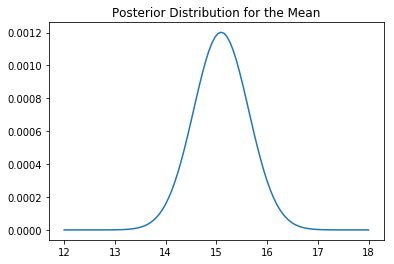

In [13]:
plt.plot(hypotheses_1, posterior[:,max_posterior[1]]);
plt.title("Posterior Distribution for the Mean");

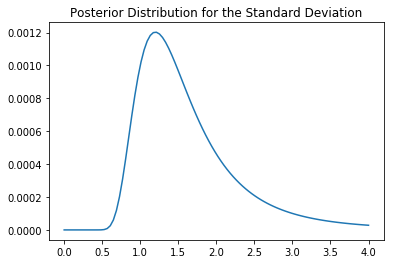

In [14]:
plt.plot(hypotheses_2, posterior[max_posterior[0],:].T);
plt.title("Posterior Distribution for the Standard Deviation");

Sweet. Now let's look at what our 2D prior and posterior distribution looks like with a contour plot.

Text(0, 0.5, 'Probabilty')

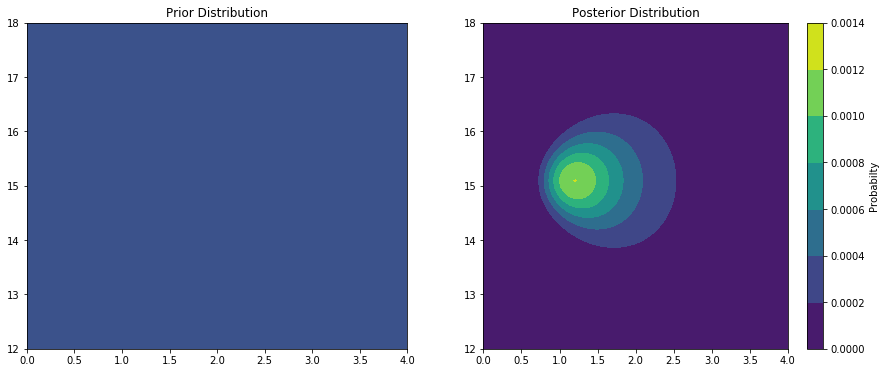

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
X, Y = np.meshgrid(hypotheses_2, hypotheses_1)
ax[0].set_title('Prior Distribution')
ax[0].contourf(X,Y, prior);
ax[1].set_title('Posterior Distribution')
CS = ax[1].contourf(X,Y, posterior);
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel('Probabilty')

# Linear Regression

Ok, let's step it up another notch and see if we can perform linear regression using only Bayes Rule, a normal pdf, and for-loops. Again, we're going to generate simulated data so we can know how we are doing with our Bayesian inference.

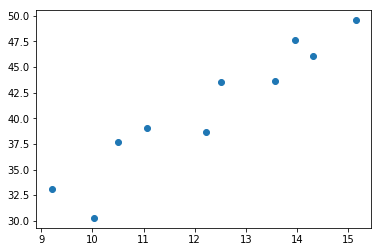

In [16]:
x = np.array([10.506, 13.9605, 10.0248, 9.21246, 13.5658, 12.2118, 12.5068, 15.1448, 11.0734, 14.3051]) 
y = np.array([37.7241, 47.5949, 30.2924, 33.1214, 43.6333, 38.6968, 43.5251, 49.5484, 39.088, 46.0416])

plt.scatter(x,y);

Now we have three parameters that we will have a range of hypotheses for: Slope, intercept, and sigma.

Setting up our grid of hypotheses:

In [17]:
hypotheses_b0 = np.linspace(2,6,40) #These are all the intercepts we want to test
hypotheses_b1 = np.linspace(1,4,40) #These are all the slopes we want to test
hypotheses_s = np.linspace(0.001,4,40) #These are all the standard deviations we want to test

In [18]:
prior = np.ones([len(hypotheses_b0), len(hypotheses_b1),len(hypotheses_s)]) # Flat prior

In [19]:
unnormalized_posterior = np.zeros([len(hypotheses_b0), len(hypotheses_b1),len(hypotheses_s)])

Now to loop through all combinations of parameters

In [20]:
marginal_likelihood = 0
for i in range(len(hypotheses_b0)):
    b0 = hypotheses_b0[i]
    for j in range(len(hypotheses_b1)):
        b1 = hypotheses_b1[j]
        for k in range(len(hypotheses_s)):
            s = hypotheses_s[k]
            unnormalized_likelihood = 1 
            for d in range(len(x)):
                unnormalized_likelihood *= stats.distributions.norm.pdf(y[d],loc=b0+b1*x[d],scale=s)
            unnormalized_posterior[i, j, k] = unnormalized_likelihood*prior[i, j, k]
            marginal_likelihood += unnormalized_likelihood*prior[i, j, k]   
                
posterior = unnormalized_posterior/marginal_likelihood

In [21]:
sum(sum(sum(posterior)))

1.0000000000000089

In [22]:
max_posterior = np.where(posterior == np.amax(posterior))
max_posterior

(array([30]), array([25]), array([19]))

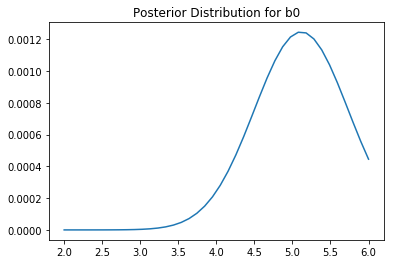

In [23]:
plt.plot(hypotheses_b0, posterior[:,max_posterior[1],max_posterior[2]]);
plt.title("Posterior Distribution for b0");

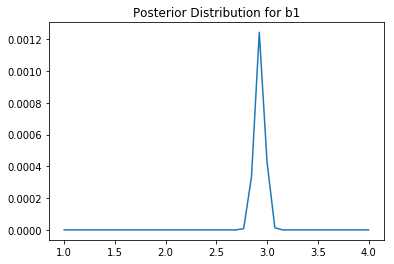

In [24]:
plt.plot(hypotheses_b1, posterior[max_posterior[0],:,max_posterior[2]].T);
plt.title("Posterior Distribution for b1");

In [25]:
print(f'b0 with Bayes:{hypotheses_b0[max_posterior[0]]}') 
print(f'b1 with Bayes:{hypotheses_b1[max_posterior[1]]}') 
print(f'sigma with Bayes:{hypotheses_s[max_posterior[2]]}') 

b0 with Bayes:[5.07692308]
b1 with Bayes:[2.92307692]
sigma with Bayes:[1.94923077]


Checking what sklearn returns for slope and intercept for comparison.

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()
lr.fit(x.reshape(-1,1), y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
lr.intercept_, lr.coef_

(array([4.67954207]), array([[2.95866672]]))

And let's check out some more statistical details using statsmodels

In [29]:
import statsmodels.api as sm

In [30]:
x1 = sm.add_constant(x)
sm.OLS(y, x1).fit().summary()

/Users/Henry/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     67.79
Date:                Sat, 17 Aug 2019   Prob (F-statistic):           3.55e-05
Time:                        14:09:57   Log-Likelihood:                -20.747
No. Observations:                  10   AIC:                             45.49
Df Residuals:                       8   BIC:                             46.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6795      4.455      1.050      0.324      -5.594      14.953
x1             2.9587      0.359      8.233      0.000       2.130       3.787
==============================================================================
Omnibus:                        1.785   Durbin-Watson:                   2.536
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.097
Skew:                          -0.758   Prob(JB):                        0.578
Kurtosis:                       2.419   Cond. No.                         81.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Example from pymc3: 

In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

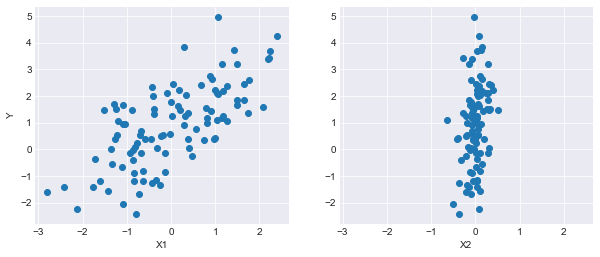

In [32]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,4))
axes[0].scatter(X1, Y)
axes[1].scatter(X2, Y)
axes[0].set_ylabel('Y'); axes[0].set_xlabel('X1'); axes[1].set_xlabel('X2');

In [33]:
Y

array([ 9.38706859e-01,  4.10296149e-01,  3.83981292e+00,  1.48115418e+00,
        4.02779506e-01,  2.46184530e+00, -1.42342679e+00, -1.27520755e+00,
        2.38380704e+00, -3.90761758e-01,  6.86815665e-01,  2.10641559e+00,
        1.84890360e+00, -8.04359754e-01,  3.93284941e-01,  2.31721220e+00,
        3.41651416e+00,  3.39016804e+00,  2.22246532e+00,  3.77308673e-01,
        3.43806883e-01,  1.66274112e+00, -1.20663529e-01,  2.18829692e+00,
        1.50706675e+00, -1.19159361e+00,  1.44784359e+00, -1.55349860e+00,
       -1.40248284e-01, -1.96609652e-02, -1.35472064e+00, -1.59474188e+00,
       -1.39656749e+00,  5.29754386e-01,  2.63051387e+00,  5.53932221e-01,
        1.76084808e+00,  2.39686504e+00,  1.47396672e+00,  9.07514885e-01,
        7.37921664e-02, -3.82899347e-01,  1.49271947e+00,  7.65880501e-01,
        2.05273917e+00,  5.63172455e-01,  4.25098874e+00,  3.26909416e-02,
        3.93785393e-01,  3.67324277e+00,  1.69575050e+00,  9.38133214e-01,
        1.35531685e+00, -